# LoanTap - **Logistic Regression** Case Study


---



## Problem Statement

LoanTap aims to revolutionize the personal loan sector by offering customized, flexible loans to millennials, particularly salaried professionals and business owners. To enhance their underwriting process, the data science team seeks to develop a predictive model that determines the creditworthiness of individuals applying for personal loans. By leveraging various borrower attributes, the goal is to accurately predict loan approval and recommend appropriate repayment terms, thereby minimizing risk and optimizing loan issuance. This involves thorough data analysis, feature engineering, and model evaluation to ensure robust and reliable predictions.



## Data Importing and Exploration

In [ ]:
# importing libraries
import pandas as pd

# loading dataset
df = pd.read_csv("/content/loantap.csv")

# data view
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
# basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
# describing the data
df.describe(include = "all")

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394274,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48816,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
# Dropping irrelevant features
df.drop(columns = ['address','title','issue_d','earliest_cr_line','emp_length'], inplace = True)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
len(df.columns)

22

In [ ]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,purpose,initial_list_status,application_type
count,396030,396030,396030,373103,396030,396030,396030,396030,396030,396030
unique,2,7,35,173105,6,3,2,14,2,3
top,36 months,B,B3,Teacher,MORTGAGE,Verified,Fully Paid,debt_consolidation,f,INDIVIDUAL
freq,302005,116018,26655,4389,198348,139563,318357,234507,238066,395319


In [ ]:
# converting categorical features into numerical

df['term'] = df['term'].replace({' 36 months':36,' 60 months':60})

In [ ]:
df['grade'] = df['grade'].replace({'A':7, 'B':6, 'C':5, 'D':4, 'E':3, 'F':2, 'G':1})

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
# dropping sub grade as it won't add any info or won't affect the output.

df.drop(columns = ['sub_grade'], inplace = True)

In [ ]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [ ]:
# this also might not add much difference so let's drop this also.

df.drop(columns = ['emp_title'], inplace = True)

In [ ]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [ ]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [ ]:
df['home_ownership'] = df['home_ownership'].replace({'MORTGAGE':2,'OWN':3,'RENT':1,'OTHER':0,'NONE':0,'ANY':0})

In [ ]:
df['verification_status'] = df['verification_status'].replace({'Verified':2, 'Source Verified':1, 'Not Verified':0})

<Axes: xlabel='purpose'>

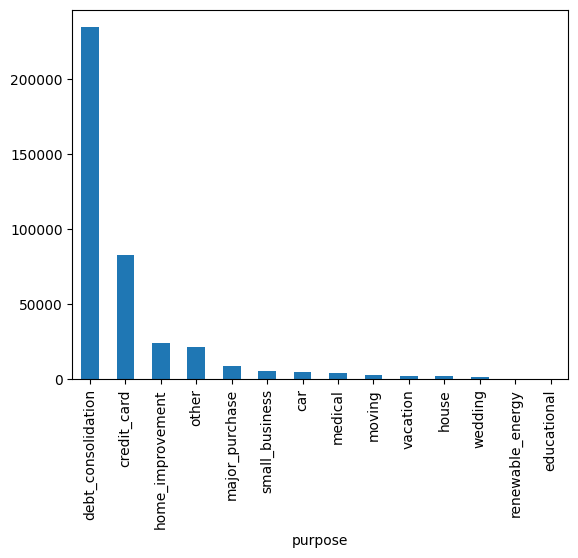

In [ ]:
df['purpose'].value_counts().plot.bar()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])

In [ ]:
df['initial_list_status'] = le.fit_transform(df['initial_list_status'])

In [ ]:
df['application_type'] = le.fit_transform(df['application_type'])

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,6,1,117000.0,0,Fully Paid,12,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0
1,8000.0,36,11.99,265.68,6,2,65000.0,0,Fully Paid,2,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0
2,15600.0,36,10.49,506.97,6,1,43057.0,1,Fully Paid,1,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0
3,7200.0,36,6.49,220.65,7,1,54000.0,0,Fully Paid,1,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0
4,24375.0,60,17.27,609.33,5,2,55000.0,2,Charged Off,1,33.95,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0


In [ ]:
# Ok we are done with encoding part.

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
purpose                     0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int64  
 5   home_ownership        396030 non-null  int64  
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  int64  
 8   loan_status           396030 non-null  object 
 9   purpose               396030 non-null  int64  
 10  dti                   396030 non-null  float64
 11  open_acc              396030 non-null  float64
 12  pub_rec               396030 non-null  float64
 13  revol_bal             396030 non-null  float64
 14  revol_util            395754 non-null  float64
 15  

In [ ]:
# Let's fill the missing values with the mean value of the column

df['mort_acc'] = df['mort_acc'].fillna(2)

In [ ]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median())

In [ ]:
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].mean())

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

## Exploratory Data Analysis

Univariate Analysis

*   Distribution plots for continuous variables: loan_amnt, int_rate, annual_inc
*   Count plots for categorical variables: term, grade, home_ownership

Bivariate Analysis:


*   Box plots: loan_amnt vs. loan_status
*   Heatmaps for correlation: df.corr()

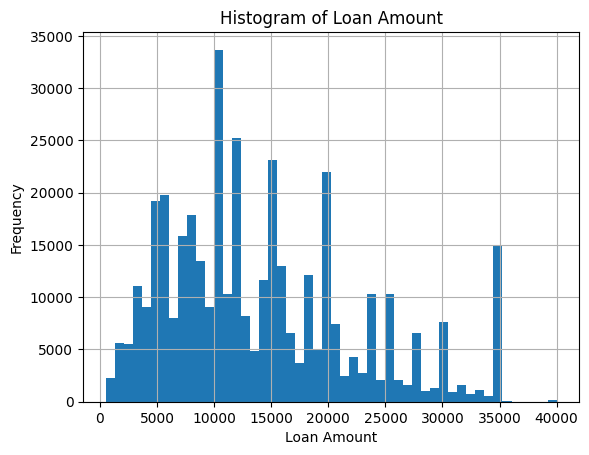

In [ ]:
import matplotlib.pyplot as plt

df['loan_amnt'].hist(bins=50)
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


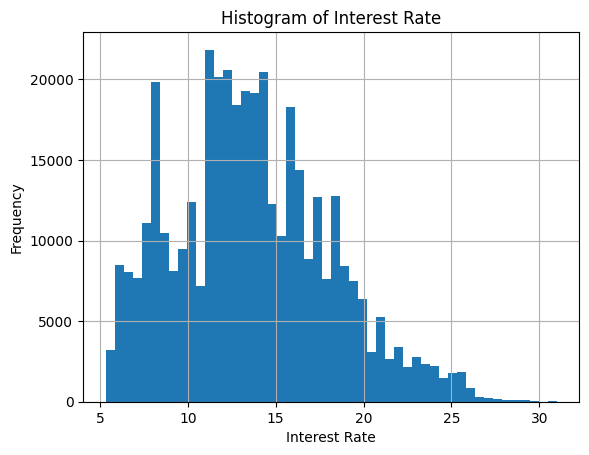

In [ ]:
df['int_rate'].hist(bins=50)
plt.title('Histogram of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

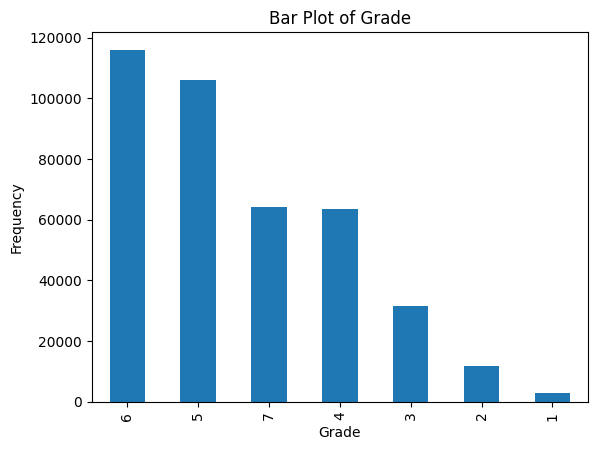

In [ ]:
# Bar plots for categorical variables
df['grade'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

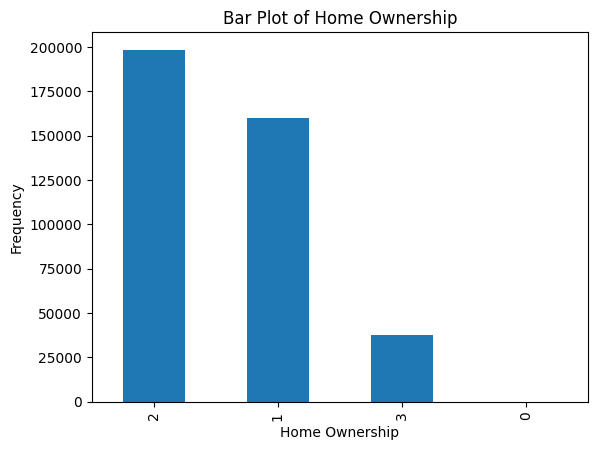

In [ ]:
df['home_ownership'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
# scaling down the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade',
       'home_ownership', 'annual_inc', 'verification_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies']

df[col] = scaler.fit_transform(df[col])
df.head()

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,-0.492243,-0.557975,-0.491799,-0.408291,0.616534,-1.086161,0.694330,-1.269299,Fully Paid,3.812228,0.491728,0.912646,-0.335785,0.996729,-0.490588,-0.034891,1.227636,-0.008284,-0.896333,-0.341282
1,-0.731551,-0.557975,-0.368816,-0.662750,0.616534,0.485493,-0.149311,-1.269299,Fully Paid,-0.292780,0.259197,1.107287,-0.335785,0.208163,-0.020118,0.133361,-0.814574,-0.008284,0.571668,-0.341282
2,0.177819,-0.557975,-0.704225,0.299609,0.616534,-1.086161,-0.505312,-0.044775,Fully Paid,-0.703281,-0.254703,0.328720,-0.335785,-0.187334,1.571298,0.049235,-0.814574,-0.008284,-0.896333,-0.341282
3,-0.827274,-0.557975,-1.598649,-0.842348,1.366267,-1.086161,-0.327774,-1.269299,Fully Paid,-0.703281,-0.820215,-1.033772,-0.335785,-0.503722,-1.321070,-1.044399,-0.814574,-0.008284,-0.896333,-0.341282
4,1.227783,1.792196,0.811824,0.707861,-0.133200,0.485493,-0.311550,1.179748,Charged Off,-0.703281,0.919608,0.328720,-0.335785,0.424414,0.654905,1.479372,-0.814574,-0.008284,-0.407000,-0.341282


## Model Building

In [ ]:
# model training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = df.drop(columns=['loan_status'])
y = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.24023111, 0.26101914, 0.27492764, ..., 0.18785886, 0.11134193,
       0.34715526])

## Accuracy Check

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89     63629
           1       0.51      0.07      0.13     15577

    accuracy                           0.80     79206
   macro avg       0.66      0.53      0.51     79206
weighted avg       0.75      0.80      0.74     79206

ROC AUC Score: 0.7022627082826108


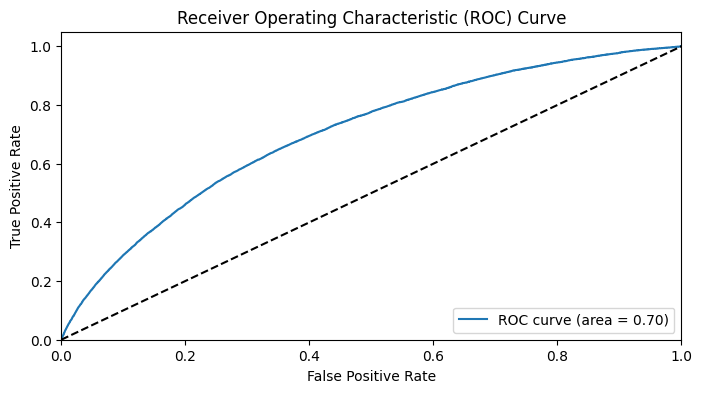

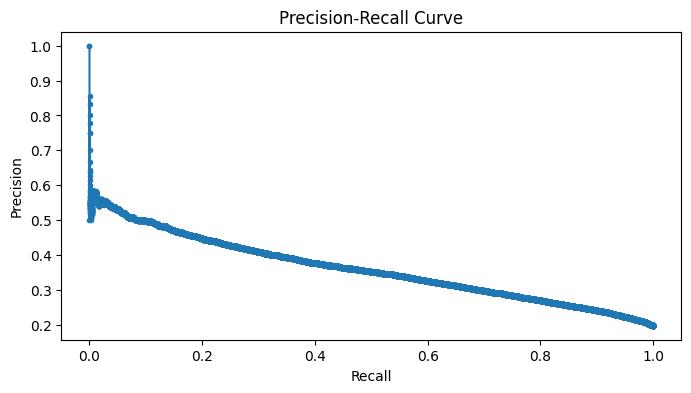

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, precision_recall_curve

# Classification Report
classification_rep = classification_report(y_test, prediction)
print('Classification Report:')
print(classification_rep)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print('ROC AUC Score:', roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## Conclusion

Percentage of customers who have fully paid their loan amount: 80.38709188697825
Correlation between Loan Amount and Installment: 0.953928908261621


Summary Report

1. Percentage of Customers Who Have Fully Paid Their Loan Amount
- **Percentage:** 80.39%

2. Correlation Between Loan Amount and Installment
- **Correlation Coefficient:** 0.95

Analysis
- **High Repayment Rate:** The high percentage of fully paid loans (80.39%) indicates a good repayment rate among customers.
- **Strong Positive Correlation:** The strong positive correlation (0.95) between loan amount and installment suggests that as the loan amount increases, the installment amount also increases proportionally.